In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def f(x):
    return 1/(1.0 + x**2)


def calc_xs(from_x, to_x, n):
    range_length = to_x - from_x

    xs = []

    for num in range(n + 1):

        xs.append( num * (range_length / n) + from_x)

    return xs

def calc_ys(xs, f):

    ys = np.zeros(len(xs))
    ys.shape = (len(xs),1)

    for i, x in enumerate(xs):
        ys[i,0] = f(x)
    
    return ys

def calc_v(xs):
    
    size = len(xs)
    
    V = np.zeros((size, size))
    
    for i, x in enumerate(xs):
        for j in range(size):
            V[i,j] = x ** j
    return V

def interpolate(from_x, to_x, n):
    xs = calc_xs(from_x, to_x, n)

    ys = calc_ys(xs, f)

    V = calc_v(xs)
    
    return np.linalg.solve(V, ys)

def poli(coef):
    return lambda x: sum([coef[i] * x**i for i in range(len(coef))])


def draw_them(from_x, to_x, step, f, p):
    
    t = np.arange(from_x, to_x + step, step)
    
    f_t = [f(i) for i in t]
    f_p = [p(i) for i in t]

    plt.plot(t, f_t, t, f_p)
    

from_x = -5.0
to_x = 5.0
step = 0.01


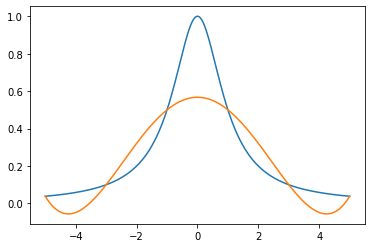

In [3]:
# for n = 5

coef1 = interpolate(from_x, to_x, n = 5)

p5 = poli(coef1)

draw_them(from_x, to_x, step, f, p5)



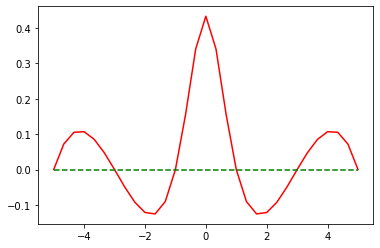

In [4]:
step_t = (to_x - from_x) / 30.0
t = np.arange(from_x, to_x + step_t, step_t)

plt.plot(t, [f(i) - p5(i) for i in t], 'r-', t, [0]*t, 'g--')

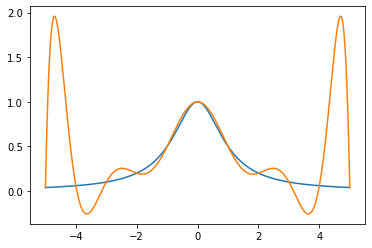

In [5]:
# for n = 10

coef2 = interpolate(from_x, to_x, n = 10)

p10 = poli(coef2)

draw_them(from_x, to_x, step, f, p10)


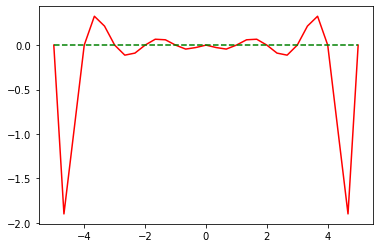

In [6]:
step_t = (to_x - from_x) / 30.0
t = np.arange(from_x, to_x + step_t, step_t)

plt.plot(t, [f(i) - p10(i) for i in t], 'r-', t, [0]*t, 'g--')

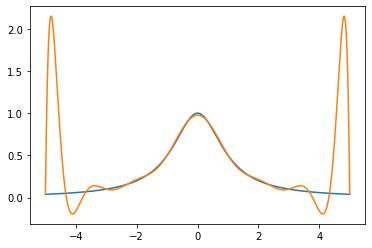

In [7]:
# for n = 15

coef3 = interpolate(from_x, to_x, n = 15)

p15 = poli(coef3)

draw_them(from_x, to_x, step, f, p15)

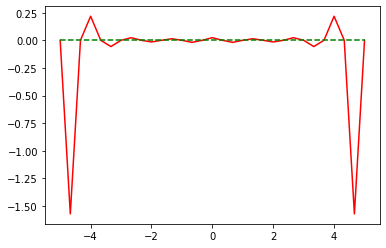

In [8]:
step_t = (to_x - from_x) / 30.0
t = np.arange(from_x, to_x + step_t, step_t)

plt.plot(t, [f(i) - p15(i) for i in t], 'r-', t, [0]*t, 'g--')

[-5.0, 4.96354437049027, 4.675081213427074, 4.1149193294682815, 3.3156132912039764, 2.323615860218843, 1.1965783214377903, -8.040613248383182e-16, -1.1965783214377874, -2.3236158602188426, -3.3156132912039746, -4.1149193294682815, -4.675081213427074, -4.96354437049027, 5.0]


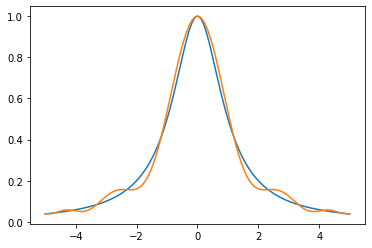

In [9]:
from math import cos, pi, sin

def f_czybyszew(a, b, k, n):
    return 0.5 * (a + b) + 0.5 * (b - a) * cos( ( (2 * k - 1) * pi) / (2 * n) )

def calc_czybyszew(from_x, to_x, n):
    
    range_length = to_x - from_x
    
    xs = [from_x]

    for num in range(n):
        a =  from_x
        b = to_x
        xs.append(f_czybyszew(a, b, num + 1, n))
        
    xs.append(to_x)
    
    return xs

xs_c = calc_czybyszew(from_x, to_x, n = 13)

print(xs_c)

ys_c = calc_ys(xs_c, f)

V_c = calc_v(xs_c)

coef_c = np.linalg.solve(V_c, ys_c)

poli_c = poli(coef_c)


draw_them(from_x, to_x, step, f, poli_c)
        

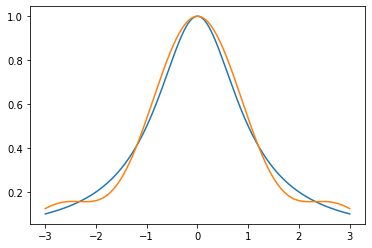

In [10]:
draw_them(from_x + 2, to_x - 2, step, f, poli_c)

[array([-8.74300632e-15]), array([-0.00023644]), array([-0.00696624]), array([0.00605887]), array([0.01641011]), array([0.00137726]), array([-0.02446401]), array([-0.02946596]), array([-0.00118137]), array([0.03945834]), array([0.05483515]), array([0.02340952]), array([-0.03508972]), array([-0.06531203]), array([-0.03328059]), array([1.25455202e-14]), array([-0.03328059]), array([-0.06531203]), array([-0.03508972]), array([0.02340952]), array([0.05483515]), array([0.03945834]), array([-0.00118137]), array([-0.02946596]), array([-0.02446401]), array([0.00137726]), array([0.01641011]), array([0.00605887]), array([-0.00696624]), array([-0.00023644]), array([-7.96654409e-14])]


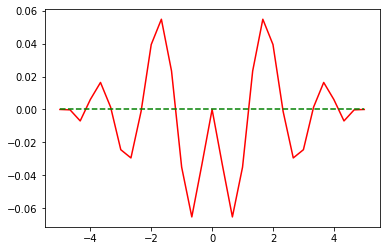

In [11]:
step_t = (to_x - from_x) / 30.0
t = np.arange(from_x, to_x + step_t, step_t)

print([f(i) - poli_c(i) for i in t])

plt.plot(t, [f(i) - poli_c(i) for i in t], 'r-', t, [0]*t, 'g--')

### Błędy pomiędzy poszczególnymi węzłami czybyszewa są mniejsze niż między węzłami równoodległymi, wynika to z nierównomiernej odległości między węzłami.

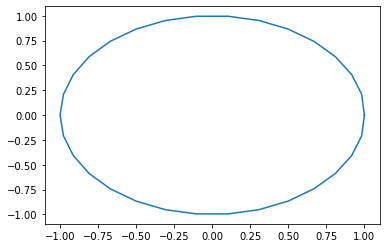

In [22]:
from scipy.interpolate import interp1d

points = 10

from_x2 = 0
to_x2 = 2 * pi

range_length = 2 * pi

t = [i * range_length / points for i in range(points + 1)]

a = 1.0

b = 1.0

x_t = [a * cos(t[i]) for i in range(points + 1)]
y_t = [b * sin(t[i]) for i in range(points + 1)]

x_f = interp1d(t, x_t, kind = 'cubic' )
y_f = interp1d(t, y_t, kind = 'cubic' )


check_points = 30

ran = np.arange(0, 2*pi + 0.001, range_length / check_points)

x_res = x_f(ran)

y_res = y_f(ran)

plt.plot(x_res, y_res)

